In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
train = pd.read_csv("datasets/sales_train.csv")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [92]:
train.shape

(2935849, 6)

In [93]:
items = pd.read_csv("datasets/items.csv")
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [94]:
categories = pd.read_csv("datasets/item_categories.csv")
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [95]:
shops = pd.read_csv("datasets/shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [96]:
test = pd.read_csv("datasets/sales_test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [97]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

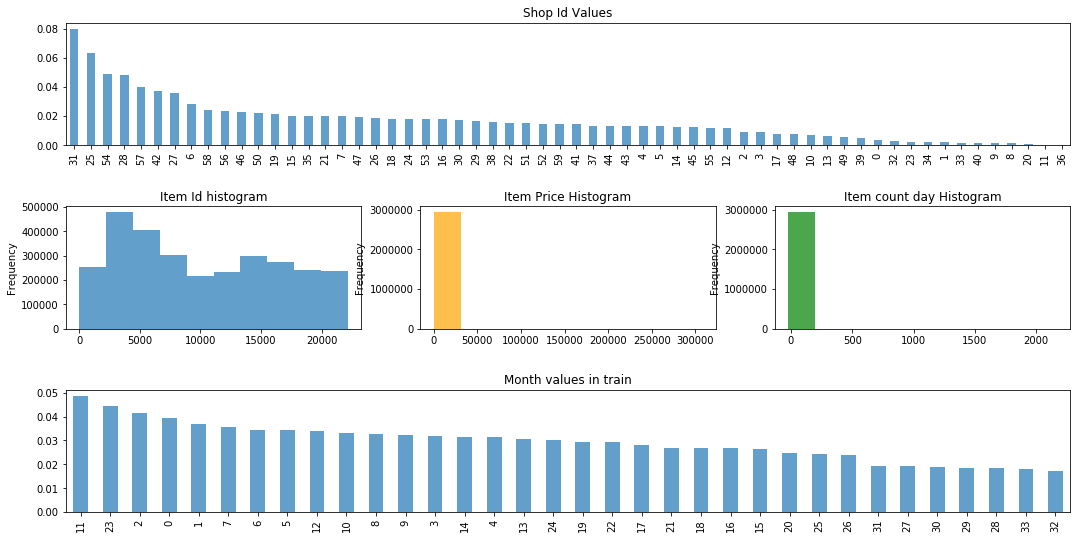

In [98]:
fig = plt.figure(figsize=(18, 9))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3, 3), (0, 0), colspan = 3)
train['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title("Shop Id Values")

plt.subplot2grid((3, 3), (1, 0))
train['item_id'].plot(kind='hist', alpha=0.7)
plt.title("Item Id histogram")

plt.subplot2grid((3, 3), (1, 1))
train['item_price'].plot(kind='hist', alpha=0.7, color='orange')
plt.title("Item Price Histogram")

plt.subplot2grid((3, 3), (1, 2))
train['item_cnt_day'].plot(kind='hist', alpha=0.7, color='green')
plt.title("Item count day Histogram")

plt.subplot2grid((3, 3), (2, 0), colspan = 3)
train['date_block_num'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title("Month values in train")

plt.show()

In [99]:
train['item_id'].value_counts(ascending=False)[:5]

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
Name: item_id, dtype: int64

In [100]:
items.loc[items['item_id']==20949]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [101]:
categories.loc[categories['item_category_id']==71]

,item_category_name,item_category_id
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71


In [102]:
test.loc[test['item_id']==20949].head(5)

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949


In [103]:
train['item_cnt_day'].sort_values(ascending=False)[:5]

2909818    2169.0
2326930    1000.0
2864235     669.0
2851091     637.0
2608040     624.0
Name: item_cnt_day, dtype: float64

In [104]:
train[train['item_cnt_day']==2169]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [105]:
items[items['item_id']==11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [106]:
train[train['item_id']==11373].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.0,1.0
58324,31.01.2013,0,12,11373,97.8,5.0
176790,01.02.2013,1,12,11373,229.0,1.0
176791,04.02.2013,1,12,11373,130.0,1.0
302468,29.03.2013,2,12,11373,139.5,2.0


In [107]:
train = train[train['item_cnt_day'] < 2000]

In [108]:
train['item_price'].sort_values(ascending=False)[:5]

1163158    307980.0
885138      59200.0
1488135     50999.0
2327159     49782.0
2917760     42990.0
Name: item_price, dtype: float64

In [109]:
train[train['item_price']==307980]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [110]:
items[items['item_id'] == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [111]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [112]:
train = train[train['item_price'] < 300000]

In [113]:
train['item_price'].sort_values()[:5]

484683   -1.0000
608763    0.0700
579766    0.0700
611400    0.0875
673155    0.0900
Name: item_price, dtype: float64

In [114]:
train[train['item_price'] == -1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [115]:
train[train['item_id'] == 2973].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352,15.01.2013,0,25,2973,2499.0,13.0
353,16.01.2013,0,25,2973,2499.0,5.0
354,17.01.2013,0,25,2973,2499.0,3.0
355,18.01.2013,0,25,2973,2499.0,2.0
356,19.01.2013,0,25,2973,2499.0,3.0


In [116]:
price_correction = train[(train['shop_id']==32) & (train['item_id']==2973) & (train['date_block_num']==4) & (train['item_price']>0)].item_price.median()
train.loc[train['item_price'] < 0, 'item_price'] = price_correction

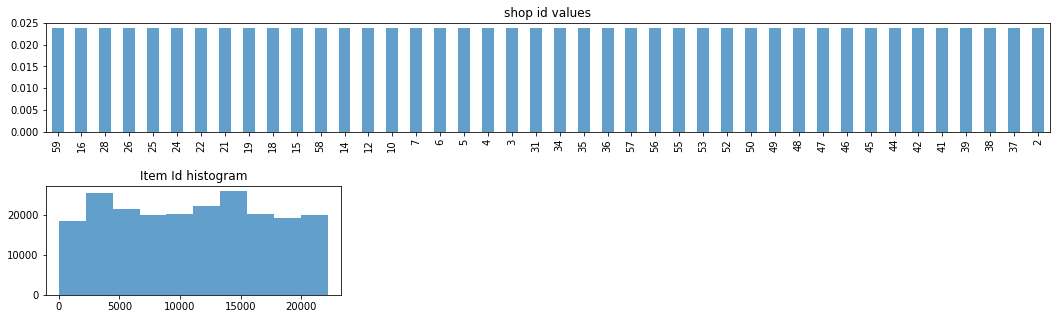

In [117]:
fig = plt.figure(figsize=(18, 8))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3, 3), (0, 0), colspan=3)
test['shop_id'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('shop id values')

plt.subplot2grid((3, 3), (1, 0))
plt.hist(test['item_id'], alpha=0.7)
plt.title('Item Id histogram')
plt.show()

In [118]:
shops_train = train['shop_id'].nunique()
shops_test = test['shop_id'].nunique()
print(shops_train)
print(shops_test)

60
42


In [119]:
shops_train_list = list(train['shop_id'].unique())
shops_test_list = list(test['shop_id'].unique())

flag = 0
if (set(shops_test_list).issubset(set(shops_train_list))):
    flag = 1
    
print(flag)

1


In [120]:
shops.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
shop_name,"!Якутск Орджоникидзе, 56 фран","!Якутск ТЦ ""Центральный"" фран","Адыгея ТЦ ""Мега""","Балашиха ТРК ""Октябрь-Киномир""","Волжский ТЦ ""Волга Молл""","Вологда ТРЦ ""Мармелад""","Воронеж (Плехановская, 13)","Воронеж ТРЦ ""Максимир""","Воронеж ТРЦ Сити-Парк ""Град""",Выездная Торговля,...,"Тюмень ТЦ ""Гудвин""","Тюмень ТЦ ""Зеленый Берег""","Уфа ТК ""Центральный""","Уфа ТЦ ""Семья"" 2","Химки ТЦ ""Мега""",Цифровой склад 1С-Онлайн,"Чехов ТРЦ ""Карнавал""","Якутск Орджоникидзе, 56","Якутск ТЦ ""Центральный""","Ярославль ТЦ ""Альтаир"""
shop_id,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59


In [121]:
train.loc[train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

train.loc[train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

train.loc[train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

In [122]:
cities = shops['shop_name'].str.split(' ').map(lambda row: row[0])
cities.unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [123]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda row: row[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(shops['city'])

array([29, 29,  0,  1,  2,  3,  4,  4,  4,  5,  6,  6,  7,  8,  8,  9, 10,
       11, 11, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       15, 15, 16, 16, 17, 18, 18, 18, 19, 19, 20, 20, 21, 22, 23, 24, 24,
       24, 25, 25, 26, 27, 28, 29, 29, 30])

In [125]:
shops['city_label'] = le.fit_transform(shops['city'])
shops.drop(['shop_name', 'city'], axis=1, inplace=True)
shops.head()

,shop_id,city_label
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [126]:
items_train = train['item_id'].nunique()
items_test = test['item_id'].nunique()
print(items_train)
print(items_test)

21806
5100


In [127]:
items_train_list = list(train['item_id'].unique())
items_test_list = list(test['item_id'].unique())

if (set(items_test_list).issubset(set(items_train_list))):
    print("yes it's subset")
else:
    print("no it's not")

no it's not


In [128]:
len(set(items_test_list).difference(items_train_list))

363

In [129]:
categories_in_test = items.loc[items['item_id'].isin(sorted(test['item_id'].unique()))].item_category_id.unique()

In [130]:
categories.loc[~categories['item_category_id'].isin(categories_in_test)].T

,1,4,8,10,13,14,17,18,32,39,...,50,51,52,53,59,66,68,80,81,82
item_category_name,Аксессуары - PS2,Аксессуары - PSP,Билеты (Цифра),Игровые консоли - PS2,Игровые консоли - PSP,Игровые консоли - PSVita,Игровые консоли - Прочие,Игры - PS2,"Карты оплаты (Кино, Музыка, Игры)",Кино - Blu-Ray 4K,...,Книги - Открытки,Книги - Познавательная литература,Книги - Путеводители,Книги - Художественная литература,Музыка - Музыкальное видео,"Подарки - Открытки, наклейки","Подарки - Сертификаты, услуги",Служебные - Билеты,Чистые носители (шпиль),Чистые носители (штучные)
item_category_id,1,4,8,10,13,14,17,18,32,39,...,50,51,52,53,59,66,68,80,81,82


In [131]:
le  = LabelEncoder()

main_categories = categories['item_category_name'].str.split('-')
categories['main_category_id'] = main_categories.map(lambda row: row[0].strip())
categories['main_category_id'] = le.fit_transform(categories['main_category_id'])

categories['sub_category_id'] = main_categories.map(lambda row: row[1].strip() if len(row) > 1 else row[0].strip())
categories['sub_category_id'] = le.fit_transform(categories['sub_category_id'])

In [132]:
categories.head()

,item_category_name,item_category_id,main_category_id,sub_category_id
0,PC - Гарнитуры/Наушники,0,0,29
1,Аксессуары - PS2,1,1,9
2,Аксессуары - PS3,2,1,10
3,Аксессуары - PS4,3,1,11
4,Аксессуары - PSP,4,1,13


In [133]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [134]:
from itertools import product

In [135]:
shops_in_jan = train.loc[train['date_block_num']==0, 'shop_id'].unique()
items_in_jan = train.loc[train['date_block_num']==0, 'item_id'].unique()
jan = list(product(*[shops_in_jan, items_in_jan, [0]]))

In [136]:
print(len(jan))

365175


In [137]:
shops_in_feb = train.loc[train['date_block_num']==1, 'shop_id'].unique()
items_in_feb = train.loc[train['date_block_num']==1, 'item_id'].unique()
feb = list(product(*[shops_in_feb, items_in_feb, [1]]))

In [138]:
print(len(feb))

375728


In [139]:
cartesian_test = []
cartesian_test.append(np.array(jan))
cartesian_test.append(np.array(feb))

In [140]:
cartesian_test

[array([[   59, 22154,     0],
        [   59,  2552,     0],
        [   59,  2554,     0],
        ...,
        [   45,   628,     0],
        [   45,   631,     0],
        [   45,   621,     0]], dtype=int64), array([[   50,  3880,     1],
        [   50,  4128,     1],
        [   50,  4124,     1],
        ...,
        [   28, 12885,     1],
        [   28, 12791,     1],
        [   28, 13433,     1]], dtype=int64)]

In [141]:
cartesian_test = np.vstack(cartesian_test)

In [142]:
cartesian_test_df = pd.DataFrame(cartesian_test, columns=['shop_id', 'item_id', 'date_block_num'])

In [143]:
cartesian_test_df.head()

,shop_id,item_id,date_block_num
0,59,22154,0
1,59,2552,0
2,59,2554,0
3,59,2555,0
4,59,2564,0


In [144]:
cartesian_test_df.shape

(740903, 3)

In [145]:
from tqdm import tqdm_notebook

def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype == "int64"]
    
    df[float_cols] = df[float_cols].astype(np.float16)
    df[int_cols] = df[int_cols].astype(np.int16)
    
    return df

In [146]:
months = train['date_block_num'].unique()

In [147]:
cartesian = []
for month in months:
    shops_in_month = train.loc[train['date_block_num']==month, 'shop_id'].unique()
    items_in_month = train.loc[train['date_block_num']==month, 'item_id'].unique()
    cartesian.append(np.array(list(product(*[shops_in_month, items_in_month, [month]])), dtype='int32'))

In [148]:
cartesian_df = pd.DataFrame(np.vstack(cartesian), columns=['shop_id', 'item_id', 'date_block_num'], dtype=np.int32)

In [149]:
cartesian_df.shape

(10913804, 3)

In [150]:
x = train.groupby(['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum().rename('item_cnt_month').reset_index()
x.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,2,27,0,1.0
1,2,27,17,1.0
2,2,30,2,1.0
3,2,30,5,1.0
4,2,30,15,1.0


In [151]:
x.tail()

,shop_id,item_id,date_block_num,item_cnt_month
1609118,59,22164,27,2.0
1609119,59,22164,30,1.0
1609120,59,22167,9,1.0
1609121,59,22167,11,2.0
1609122,59,22167,17,1.0


In [152]:
x.shape

(1609123, 4)

In [153]:
new_train = pd.merge(cartesian_df, x, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)

In [154]:
new_train['item_cnt_month'] = np.clip(new_train['item_cnt_month'], 0, 20)

In [155]:
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,59,22154,0,1.0
1,59,2552,0,0.0
2,59,2554,0,0.0
3,59,2555,0,0.0
4,59,2564,0,0.0


In [156]:
del x
del cartesian_df
del cartesian
del cartesian_test
del cartesian_test_df
del feb
del jan
del items_test_list
del items_train_list
del train

In [157]:
new_train.sort_values(['date_block_num', 'shop_id', 'item_id'], inplace=True)
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month
114910,2,19,0,0.0
117150,2,27,0,1.0
120623,2,28,0,0.0
118316,2,29,0,0.0
114602,2,32,0,0.0


In [158]:
test.insert(loc=3, column='date_block_num', value=34)

In [159]:
test['item_cnt_month'] = 0

In [160]:
test.head()

,ID,shop_id,item_id,date_block_num,item_cnt_month
0,0,5,5037,34,0
1,1,5,5320,34,0
2,2,5,5233,34,0
3,3,5,5232,34,0
4,4,5,5268,34,0


In [161]:
new_train = new_train.append(test.drop('ID', axis=1))

In [162]:
new_train = pd.merge(new_train, shops, on=['shop_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label
0,2,19,0,0.0,0
1,2,27,0,1.0,0
2,2,28,0,0.0,0
3,2,29,0,0.0,0
4,2,32,0,0.0,0


In [163]:
new_train = pd.merge(new_train, items.drop('item_name', axis=1), on=['item_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id
0,2,19,0,0.0,0,40
1,2,27,0,1.0,0,19
2,2,28,0,0.0,0,30
3,2,29,0,0.0,0,23
4,2,32,0,0.0,0,40


In [164]:
new_train = pd.merge(new_train, categories.drop('item_category_name', axis=1), on=['item_category_id'], how='left')
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4


In [179]:
def generate_lag(train, months, lag_column):
    for month in months:
        train_shift = train[['date_block_num', 'shop_id', 'item_id', lag_column]].copy()
        train_shift.columns = ['date_block_num', 'shop_id', 'item_id', lag_column + '_lag_' + str(month)]
        train_shift['date_block_num'] += month
        train = pd.merge(train, train_shift, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return train

In [166]:
del items
del categories
del shops
del test

In [180]:
new_train = downcast_dtypes(new_train)
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4


In [181]:
import gc
gc.collect()

281

In [ ]:
%%time
new_train = generate_lag(new_train, [1,2,3,4,5,6,12], 'item_cnt_month')

In [170]:
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4


In [171]:
%%time
group = new_train.groupby(['date_block_num', 'item_id'])['item_cnt_month'].mean().rename('item_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'item_id'], how='left')
new_train = generate_lag(new_train, [1,2,3,6,12], 'item_month_mean')
new_train.drop(['item_month_mean'], axis=1, inplace=True)

Wall time: 3min 12s
Compiler : 136 ms
Parser   : 254 ms


In [172]:
%%time
group = new_train.groupby(['date_block_num', 'shop_id'])['item_cnt_month'].mean().rename('shop_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'shop_id'], how='left')
new_train = generate_lag(new_train, [1,2,3,6,12], 'shop_month_mean')
new_train.drop(['shop_month_mean'], axis=1, inplace=True)

Wall time: 3min 3s
Compiler : 136 ms
Parser   : 281 ms


In [173]:
%%time
group = new_train.groupby(['date_block_num', 'shop_id', 'item_category_id'])['item_cnt_month'].mean().rename('shop_category_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
new_train = generate_lag(new_train, [1,2], 'shop_category_month_mean')
new_train.drop(['shop_category_month_mean'], axis=1, inplace=True)

Wall time: 2min 1s
Compiler : 143 ms
Parser   : 311 ms


In [174]:
%%time
group = new_train.groupby(['date_block_num', 'main_category_id'])['item_cnt_month'].mean().rename('main_category_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'main_category_id'], how='left')
new_train = generate_lag(new_train, [1], 'main_category_month_mean')
new_train.drop(['main_category_month_mean'], axis=1, inplace=True)

Wall time: 1min 2s
Compiler : 496 ms
Parser   : 183 ms


In [175]:
%%time
group = new_train.groupby(['date_block_num', 'sub_category_id'])['item_cnt_month'].mean().rename('sub_category_month_mean').reset_index()
new_train = pd.merge(new_train, group, on=['date_block_num', 'sub_category_id'], how='left')
new_train = generate_lag(new_train, [1,2], 'sub_category_month_mean')
new_train.drop(['sub_category_month_mean'], axis=1, inplace=True)

Wall time: 1min 8s
Compiler : 910 ms
Parser   : 264 ms


In [176]:
new_train.tail()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
11127999,45,18454,34,0.0,20,55,13,2
11128000,45,16188,34,0.0,20,64,14,42
11128001,45,15757,34,0.0,20,55,13,2
11128002,45,19648,34,0.0,20,40,11,4
11128003,45,969,34,0.0,20,37,11,1


In [177]:
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4
